# Material simulation Python tools: 

This notebook is made with the intention of teaching the basics of Material Simulation through the use of Python libraries. These libraries can help speed the automation and analysis of materials calculations. The main libraries we will be looking at are ASE and Pymatgen. 

## Benefits of Using Objects in Python



### Introduction
In Python, everything is an object. Understanding and leveraging object-oriented programming (OOP) concepts can greatly enhance the structure and modularity of your code. Here are some benefits of using objects in Python:

1. **Encapsulation:**
   - Objects encapsulate data and behavior within a single unit, making it easier to manage and understand.

2. **Abstraction:**
   - Objects allow you to abstract complex systems, providing a simplified interface for users. They hide the implementation details and expose only what is necessary.

3. **Reusability:**
   - Objects promote code reusability. Once you create a class (a blueprint for an object), you can create multiple instances of that class, reducing redundancy in your code.

4. **Inheritance:**
   - Inheritance allows you to create a new class that is a modified version of an existing class. This promotes code reuse and helps in building hierarchical relationships between classes.

5. **Polymorphism:**
   - Polymorphism allows objects of different types to be treated as objects of a common type. This enables flexibility and extensibility in your code.




In [28]:
class Dog:
    def __init__(self, name, age):
        self.name = name
        self.age = age

    def bark(self):
        print(f"{self.name} is barking!")

# Creating an instance of the Dog class
my_dog = Dog("Buddy", 3)

# Accessing attributes and calling methods
print(f"{my_dog.name} is {my_dog.age} years old.")
my_dog.bark()


Buddy is 3 years old.
Buddy is barking!


## Import modules

In [33]:
try:
    import ase
except ImportError:
    !pip install ase
try: 
    import pymatgen
except ImportError:
    !pip install pymatgen


# Pymatgen Structures and Molecules

Most of the fundamentals of pymatgen are expressed in terms of [**`Molecule`**](http://pymatgen.org/pymatgen.core.structure.html#pymatgen.core.structure.Molecule) and [**`Structure`**](http://pymatgen.org/pymatgen.core.structure.html#pymatgen.core.structure.Structure) objects.

While we will mostly be using `Structure`, `Stucture` and `Molecule` are very similar conceptually. The main difference is that `Structure` supports full periodicity required to describe crystallographic structures.

Creating a `Structure` can be done in one line, even for complicated crystallographic structures. However, we'll start by introducing the somewhat simpler `Molecule` object, and then use this understanding of `Molecule` to introduce `Structure`.

## Creating a Molecule

Start by importing `Molecule`:

In [2]:
from pymatgen.core.structure import Molecule

In a Jupyter notebook, you can show help for any Python object by clicking on the object and pressing **Shift+Tab**. This will give you a list of arguments and keyword arguments necessary to construct the object, as well as the documentation ('docstring') which gives more information on what each argument means.

In [3]:
Molecule

pymatgen.core.structure.Molecule

Molecule takes input **arguments** `species` and `coords`, and input **keyword arguments** `charge`, `spin_multiplicity`, `validate_proximity` and `site_properties`.

Keyword arguments come with a default value (the value after the equals sign), and so keyword arguments are optional.

Arguments (without default values) are mandatory.

In [4]:
c_monox = Molecule(["C","O"], [[0.0, 0.0, 0.0], [0.0, 0.0, 1.2]])
print(c_monox)

Full Formula (C1 O1)
Reduced Formula: CO
Charge = 0.0, Spin Mult = 1
Sites (2)
0 C     0.000000     0.000000     0.000000
1 O     0.000000     0.000000     1.200000


Alright, now let's use a keyword variable to change a default. How about we make an anion?

In [5]:
oh_minus = Molecule(["O", "H"], [[0.0, 0.0, 0.0], [0.0, 0.0, 1.0]], charge=-1)
print(oh_minus)

Full Formula (H1 O1)
Reduced Formula: H2O2
Charge = -1, Spin Mult = 1
Sites (2)
0 O     0.000000     0.000000     0.000000
1 H     0.000000     0.000000     1.000000


You can also create Molecule objects from files. Let's say you have an \*.xyz file called "water.xyz". You can import that into pymatgen with `Molecule.from_file`, like:

In [21]:
water = Molecule.from_file("water.xyz")
print(water)

Full Formula (H2 O1)
Reduced Formula: H2O
Charge = 0, Spin Mult = 1
Sites (3)
0 O    -0.070000    -0.026960    -0.095240
1 H     0.919330    -0.015310    -0.054070
2 H    -0.359290     0.231000     0.816010


## Exercise: Making Molecules

Try it yourself! Create molecules however you like!

In this folder are several example molecules (`methane.xyz`, `furan.xyz`, and `benzene.xyz`). Try loading these files with `Molecule.from_file`. You can also try making a Molecule from a list of species and coordinates. Try changing the default parameters - see what you can and cannot do (for instance, look at varying the charge and the spin multiplicity).

## What's in a Molecule? Introducing Sites, Elements and Species

You can access properties of the molecule, such as the Cartesian coordinates of its sites:

In [ ]:
print(c_monox.cart_coords)

or properties that are computed on-the-fly, such as its center of mass:

In [ ]:
print(c_monox.center_of_mass)

To see the full list of available properties and methods, press **Tab** after typing `my_molecule.` in your Jupyter notebook. There are methods used to modify the molecule and these take additional argument(s). For example, to add a charge to the molecule:

In [ ]:
c_monox.set_charge_and_spin(charge=1)

In [ ]:
print(c_monox)

A molecule is essentially a list of `Site` objects. We can access these sites like we would a list in Python. For example, to obtain the total number of sites in the molecule:

In [ ]:
len(c_monox)

Or to access the first site (note that Python is a 0-indexed programming language, so the first site is site 0):

In [ ]:
print(c_monox[0])

And just like a list, I can even change the elements of a molecule.

In [7]:
c_monox[0] = "O"
c_monox[1] = "C"
print(c_monox)

Full Formula (C1 O1)
Reduced Formula: CO
Charge = 0.0, Spin Mult = 1
Sites (2)
0 O     0.000000     0.000000     0.000000
1 C     0.000000     0.000000     1.200000


A site object contains information on the site's identity and position in space.

In [8]:
site0 = c_monox[0]

In [9]:
site0.coords

array([0., 0., 0.])

In [10]:
site0.specie

Element O

Here, because we switched the elements, the site holds the element O. In general, a site can hold an [**`Element`**](http://pymatgen.org/pymatgen.core.periodic_table.html#pymatgen.core.periodic_table.Element), a [**`Specie`**](http://pymatgen.org/pymatgen.core.periodic_table.html#pymatgen.core.periodic_table.Specie) or a [**`Composition`**](http://pymatgen.org/pymatgen.core.composition.html#pymatgen.core.composition.Composition). Let's look at each of these in turn.

In [11]:
from pymatgen.core.composition import Element, Composition
from pymatgen.core.periodic_table import Specie

An `Element` is simply an element from the Periodic Table.

In [12]:
carbon = Element('C')

Elements have properties such as atomic mass, average ionic radius and more:

In [13]:
carbon.average_ionic_radius

0.3

A `Specie` can contain additional information, such as oxidation state:

In [14]:
o_ion = Specie('O', oxidation_state=-2)
o_ion

Species O2-

Again, we can access both these **`Specie`**-specific properties and more general properties of Elements.

In [15]:
o_ion.oxi_state

-2

In [16]:
o_ion.atomic_mass

15.9994

Or, for convenience, we can use strings, which will be interpreted as elements with oxidation states:

In [29]:
Specie('O2-')

Species O2-

Finally, a `Composition` is an object that can hold certain amounts of different elements or species. This is most useful in a disordered Structure, and would rarely be used in a Molecule. For example, a site that holds 50% Au and 50% Cu would be set as follows:

In [18]:
comp = Composition({'Au': 0.5, 'Cu': 0.5})

A **`Composition`** contains more information than either an **`Element`** or a **`Specie`**. Because it can contain multiple **`Elements`**/**`Species`**, you can obtain the formula, or the chemical system.

In [19]:
print("formula", comp.alphabetical_formula)
print("chemical system", comp.chemical_system)

formula Au0.5 Cu0.5
chemical system Au-Cu


When we construct a `Molecule`, the input argument will automatically be converted into one of `Element`, `Specie` or `Composition`. Thus, in the previous example, when we first defined carbon monoxide, the input `['C', 'O']` was converted to `[Element C, Element O]`.

## Exercise: Hydrogen Cyanide

Construct the linear HCN molecule where each bond distance is the sum of the two atomic radii.

HINT: To do this, you'll probably want to use some Element properties!

In [20]:
H_rad = Element('H').atomic_radius
C_rad = Element('C').atomic_radius
N_rad = Element('N').atomic_radius
HC_bond_dist = H_rad + C_rad
CN_bond_dist = C_rad + N_rad
H_pos = 0
C_pos = H_pos + HC_bond_dist
N_pos = C_pos + CN_bond_dist
hcn = Molecule(['H','C','N'], [[H_pos, 0, 0], [C_pos, 0, 0],[N_pos, 0, 0]])
print(hcn)

Full Formula (H1 C1 N1)
Reduced Formula: HCN
Charge = 0.0, Spin Mult = 1
Sites (3)
0 H     0.000000     0.000000     0.000000
1 C     0.950000     0.000000     0.000000
2 N     2.300000     0.000000     0.000000


## Creating a Structure and Lattice

Creating a `Structure` is very similar to creating a `Molecule`, except we now also have to specify a `Lattice`. 

In [24]:
from pymatgen.core import Lattice, Structure

A `Lattice` can be created in one of several ways, such as by inputting a 3x3 matrix describing the individual lattice vectors. For example, a cubic lattice of length 5 Ångstrom:

In [25]:
my_lattice = Lattice([[5, 0, 0], [0, 5, 0], [0, 0, 5]])

In [26]:
print(my_lattice)

5.000000 0.000000 0.000000
0.000000 5.000000 0.000000
0.000000 0.000000 5.000000


Equivalently, we can create it from its lattice parameters:

In [27]:
my_lattice_2 = Lattice.from_parameters(5, 5, 5, 90, 90, 90)

Or, since we know in this case that we have a cubic lattice, a == b == c and alpha == beta == gamma == 90 degrees, so we can simply put:

In [28]:
my_lattice_3 = Lattice.cubic(5)

We can confirm that these lattices are the same:

In [29]:
my_lattice == my_lattice_2 == my_lattice_3

True

Now, we can create a simple crystal structure. Let's start with body-centered-cubic iron:

In [30]:
bcc_fe = Structure(Lattice.cubic(2.8), ["Fe", "Fe"], [[0, 0, 0], [0.5, 0.5, 0.5]])
print(bcc_fe)

Full Formula (Fe2)
Reduced Formula: Fe
abc   :   2.800000   2.800000   2.800000
angles:  90.000000  90.000000  90.000000
pbc   :       True       True       True
Sites (2)
  #  SP      a    b    c
---  ----  ---  ---  ---
  0  Fe    0    0    0
  1  Fe    0.5  0.5  0.5


In [31]:
print(bcc_fe)

Full Formula (Fe2)
Reduced Formula: Fe
abc   :   2.800000   2.800000   2.800000
angles:  90.000000  90.000000  90.000000
pbc   :       True       True       True
Sites (2)
  #  SP      a    b    c
---  ----  ---  ---  ---
  0  Fe    0    0    0
  1  Fe    0.5  0.5  0.5


Creating this `Structure` was similar to creating a `Molecule` in that we provided a list of elements and a list of positions. However, there are two key differences: we had to include our `Lattice` object when creating the `Structure` and since we have a lattice, we can define the positions of our sites in *fractional coordinates* with respect to that lattice instead of Cartesian coordinates.

It's also possible to create an equivalent `Structure` using Cartesian coordinates:

In [32]:
bcc_fe_from_cart = Structure(Lattice.cubic(2.8), ["Fe", "Fe"], [[0, 0, 0], [1.4, 1.4, 1.4]],
                             coords_are_cartesian=True)
print(bcc_fe_from_cart)

Full Formula (Fe2)
Reduced Formula: Fe
abc   :   2.800000   2.800000   2.800000
angles:  90.000000  90.000000  90.000000
pbc   :       True       True       True
Sites (2)
  #  SP      a    b    c
---  ----  ---  ---  ---
  0  Fe    0    0    0
  1  Fe    0.5  0.5  0.5


We can check that both structures are equivalent:

In [33]:
bcc_fe == bcc_fe_from_cart

True

As in a `Molecule`, we can access properties of the structure, such as its volume:

In [34]:
bcc_fe.volume

21.951999999999995

## Creating Structures from Spacegroups

Structures can also be created directly from their spacegroup:

In [35]:
bcc_fe = Structure.from_spacegroup("Im-3m", Lattice.cubic(2.8), ["Fe"], [[0, 0, 0]])
print(bcc_fe)

Full Formula (Fe2)
Reduced Formula: Fe
abc   :   2.800000   2.800000   2.800000
angles:  90.000000  90.000000  90.000000
pbc   :       True       True       True
Sites (2)
  #  SP      a    b    c
---  ----  ---  ---  ---
  0  Fe    0    0    0
  1  Fe    0.5  0.5  0.5


In [36]:
nacl = Structure.from_spacegroup("Fm-3m", Lattice.cubic(5.692), ["Na+", "Cl-"],
                                 [[0, 0, 0], [0.5, 0.5, 0.5]])
print(nacl)

Full Formula (Na4 Cl4)
Reduced Formula: NaCl
abc   :   5.692000   5.692000   5.692000
angles:  90.000000  90.000000  90.000000
pbc   :       True       True       True
Sites (8)
  #  SP      a    b    c
---  ----  ---  ---  ---
  0  Na+   0    0    0
  1  Na+   0.5  0.5  0
  2  Na+   0.5  0    0.5
  3  Na+   0    0.5  0.5
  4  Cl-   0.5  0.5  0.5
  5  Cl-   0    0    0.5
  6  Cl-   0    0.5  0
  7  Cl-   0.5  0    0


And spacegroups can be obtained from a structure:

In [37]:
nacl.get_space_group_info()

('Fm-3m', 225)

Where 225 is the spacegroup number.

## Supercells

Alright, we are now well-versed in the art of creating singular structures. But in some cases, you really don't just want one unit cell; you want a supercell. Pymatgen provides a very simple interface to create superstructures. Let's start with the simplest structure that we can imagine: Polonium, a simple cubic metal.

In [38]:
polonium = Structure(Lattice.cubic(3.4), ["Po"], [[0.0, 0.0, 0.0]])

print(polonium)

Full Formula (Po1)
Reduced Formula: Po
abc   :   3.400000   3.400000   3.400000
angles:  90.000000  90.000000  90.000000
pbc   :       True       True       True
Sites (1)
  #  SP      a    b    c
---  ----  ---  ---  ---
  0  Po      0    0    0


To make a supercell, we can just multiply the structure by a tuple!

In [39]:
supercell = polonium * (2, 2, 2)
print(supercell)

Full Formula (Po8)
Reduced Formula: Po
abc   :   6.800000   6.800000   6.800000
angles:  90.000000  90.000000  90.000000
pbc   :       True       True       True
Sites (8)
  #  SP      a    b    c
---  ----  ---  ---  ---
  0  Po    0    0    0
  1  Po    0    0    0.5
  2  Po    0    0.5  0
  3  Po    0    0.5  0.5
  4  Po    0.5  0    0
  5  Po    0.5  0    0.5
  6  Po    0.5  0.5  0
  7  Po    0.5  0.5  0.5


## Exercise: Barium Titanate

Load BaTiO3 from the CIF file provided (`BaTiO3.cif`). Replace the barium with a new element with atomic number equal to the the day of the month you were born (e.g. 1st = hydrogen, 31st = gallium). Then, make a supercell of N unit cells in one cartesian direction of your choice where N is the integer of your birth month (e.g. January = 1, December = 12).

In [15]:
BaTiO3=Structure.from_file("BaTiO3.cif")
print(BaTiO3.get_space_group_info())
BaTiO3.replace(0,'Mg')
BaTiO3=BaTiO3*(1,1,4)
print(BaTiO3)
print(BaTiO3.get_space_group_info())

NameError: name 'Structure' is not defined

## Summary

This notebook is intended to provide a short introduction to some of the functionality of pymatgen. We've examined the building blocks of pymatgen: the `Structure` and `Molecule` objects, as well as the `Lattice`, `Element`, `Specie` and `Composition` objects that they're made up of.

# ASE atoms and structure object 

Similar to Pymatgen ASE uses object to create data structures to contain the information of a given crystal or molecular structure. 

## Reading from Text file

ASE has a major advantage to Pymatgen in regards to reading files, it is more efficient in the code the object is programmed and the Documentation is cleaner to read. Another advantage I see is that it's really good at reading output files. Check Ase.io documentation for full list of outputs it can parse. [ASE documentation](https://wiki.fysik.dtu.dk/ase/ase/io/io.html)

In [2]:
from ase.io import read,write

Read a Quantum Espresso output file for Ionic relaxation

In [18]:
file = './espresso.out' # Location of your file if not in the same directory 
atoms = read(file,index=':')

Try reading an output file that you have in your computer, and writing to another output

## Visualizing ASE atoms object within a Jupyter notebook

In [19]:
from ase.visualize import view
view(atoms[0],viewer='x3d')

## Checking the energies of each optimization step

In [25]:
for n, atom in enumerate(atoms): 
    e=atom.get_total_energy()
    print(f"Total energy of the optimization {n+1} step is: {e} eV")

Total energy of the optimization 1 step is: -158289.8066186576 eV
Total energy of the optimization 2 step is: -158386.25860947213 eV
Total energy of the optimization 3 step is: -158456.00039092716 eV
Total energy of the optimization 4 step is: -158485.34297200973 eV
Total energy of the optimization 5 step is: -158497.09875284138 eV
Total energy of the optimization 6 step is: -158507.59570022477 eV
Total energy of the optimization 7 step is: -158521.3833628449 eV
Total energy of the optimization 8 step is: -158533.3866171989 eV
Total energy of the optimization 9 step is: -158534.83782152535 eV
Total energy of the optimization 10 step is: -158545.30725479827 eV


Now try seeing the forces and the stress. What other properties can you obtain from the ASE atoms object ? 

## ASE calculators


Another extremely useful function of ASE is using calculators to create a Python wrapper to run Software that can calculate properties such as (Quantum Espresso, VASP, LAMMPS, Machine learning potentials)

### Atomization energy

In [35]:
from ase import Atoms
from ase.calculators.emt import EMT

atom = Atoms('N')
atom.calc = EMT()
e_atom = atom.get_potential_energy()

d = 1.1
molecule = Atoms('2N', [(0., 0., 0.), (0., 0., d)])
molecule.calc = EMT()
e_molecule = molecule.get_potential_energy()

e_atomization = e_molecule - 2 * e_atom

print('Nitrogen atom energy: %5.2f eV' % e_atom)
print('Nitrogen molecule energy: %5.2f eV' % e_molecule)
print('Atomization energy: %5.2f eV' % -e_atomization)

Nitrogen atom energy:  5.10 eV
Nitrogen molecule energy:  0.44 eV
Atomization energy:  9.76 eV


### Using calculators to use Machine-Learned Force Fields

Read the documentation for calculators to see all the calculators that are included in [ASE calculators](https://wiki.fysik.dtu.dk/ase/ase/calculators/calculators.html) . 

In [40]:
!pip install torchani

In [1]:
from ase.lattice.cubic import Diamond
from ase.md.langevin import Langevin
from ase.optimize import BFGS
from ase import units
import torchani

# Now let's set up a crystal
atoms = Diamond(symbol="C", pbc=True)
print(len(atoms), "atoms in the cell")


8 atoms in the cell


/home/nacho/miniconda3/envs/general/lib/python3.10/site-packages/torchani/aev.py:16: UserWarning: cuaev not installed
  warnings.warn("cuaev not installed")


In [3]:
from ase.lattice.cubic import Diamond
from ase.md.langevin import Langevin
from ase.optimize import BFGS
from ase import units
import torchani

atoms = Diamond(symbol="C", pbc=True)
print(len(atoms), "atoms in the cell")

8 atoms in the cell


In [6]:
# Now let's create a calculator from builtin models:
calculator = torchani.models.ANI1ccx().ase()
atoms.set_calculator(calculator)

/home/nacho/miniconda3/envs/general/lib/python3.10/site-packages/torchani/resources/


In [7]:
#Calculate the energy 

atoms.get_total_energy()

-8311.226176967144

In [9]:
print("Begin minimizing...")
opt = BFGS(atoms)
opt.run(fmax=0.001)
print()

Begin minimizing...
      Step     Time          Energy         fmax
BFGS:    0 15:44:17    -8311.226177        0.0000



In [10]:
def printenergy(a=atoms):
    """Function to print the potential, kinetic and total energy."""
    epot = a.get_potential_energy() / len(a)
    ekin = a.get_kinetic_energy() / len(a)
    print('Energy per atom: Epot = %.3feV  Ekin = %.3feV (T=%3.0fK)  '
          'Etot = %.3feV' % (epot, ekin, ekin / (1.5 * units.kB), epot + ekin))

### Equation of state (EOS)

First, do a bulk calculation for different lattice constants:



In [36]:
import numpy as np

from ase import Atoms
from ase.calculators.emt import EMT
from ase.io.trajectory import Trajectory

a = 4.0  # approximate lattice constant
b = a / 2
ag = Atoms('Ag',
           cell=[(0, b, b), (b, 0, b), (b, b, 0)],
           pbc=1,
           calculator=EMT())  # use EMT potential
cell = ag.get_cell()
traj = Trajectory('Ag.traj', 'w')
for x in np.linspace(0.95, 1.05, 5):
    ag.set_cell(cell * x, scale_atoms=True)
    ag.get_potential_energy()
    traj.write(ag)

100.14189241976759 GPa


<Axes: title={'center': 'sj: E: -0.000 eV, V: 16.781 Å$^3$, B: 100.142 GPa'}, xlabel='volume [Å$^3$]', ylabel='energy [eV]'>

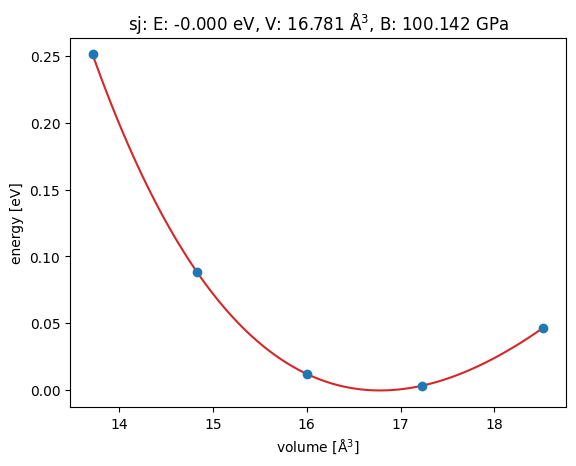

In [37]:
from ase.eos import EquationOfState
from ase.io import read
from ase.units import kJ

configs = read('Ag.traj@0:5')  # read 5 configurations
# Extract volumes and energies:
volumes = [ag.get_volume() for ag in configs]
energies = [ag.get_potential_energy() for ag in configs]
eos = EquationOfState(volumes, energies)
v0, e0, B = eos.fit()
print(B / kJ * 1.0e24, 'GPa')
eos.plot('Ag-eos.png')

## Final exercise: 

Pull a cif structure from your research, or Materials Project. Read the file , and use EMT and ANI to calculate the energy , compare the energy with known DFT values of that structure and print how they compare. 